In [99]:


def read_hist_file(filename):
    import numpy as np
    data = []
    for line in open(filename):
        line_arr = line.strip().split()
        haplotypes =  map(float, line_arr)
        data.append(haplotypes)

    data = np.asarray(data)
    print data.shape
    p_fail = data[:,3] / np.sum(data, axis=1)

    x, y, x1,y1 = [],[],[],[]
    for i,f in enumerate(p_fail):
        if f == np.nan:
            continue
        else:
            x.append(i)
            y.append(f)
    print p_fail
    return x, y




In [109]:
x_x, y_x = read_hist_file("min_4_hist.txt")
x_x19, y_x19 = read_hist_file("hist_04_x19.txt")

(103, 4)
[        nan         nan         nan         nan  0.01922899  0.02317108
  0.02502014  0.02433132  0.02758557  0.02865113  0.03115767  0.0326355
  0.03287325  0.0353698   0.03502683  0.03753708  0.04313954  0.043887
  0.04407093  0.04499072  0.04522227  0.05254647  0.0500811   0.05501185
  0.05850464  0.06155141  0.06649333  0.07103708  0.06274915  0.06203784
  0.0608048   0.07937152  0.07220125  0.06652813  0.06475733  0.06120901
  0.08791448  0.08015334  0.06222773  0.09240242  0.08157447  0.10417209
  0.101098    0.10030363  0.1080889   0.12257777  0.15395639  0.15403682
  0.12131311  0.1041648   0.15136307  0.15612796  0.11757004  0.1549981
  0.21375616  0.19518861  0.19705538  0.2337169   0.14144158  0.15962465
  0.13901279  0.19261671  0.27257937  0.23123809  0.25157324  0.18806362
  0.10641393  0.1961767   0.22075795  0.20683832  0.16350091  0.13158703
  0.19950375  0.1828101          nan  0.14584633         nan         nan
         nan  0.2930862          nan         n

/Users/hillst/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in divide


In [50]:
from pylab import *
%matplotlib inline

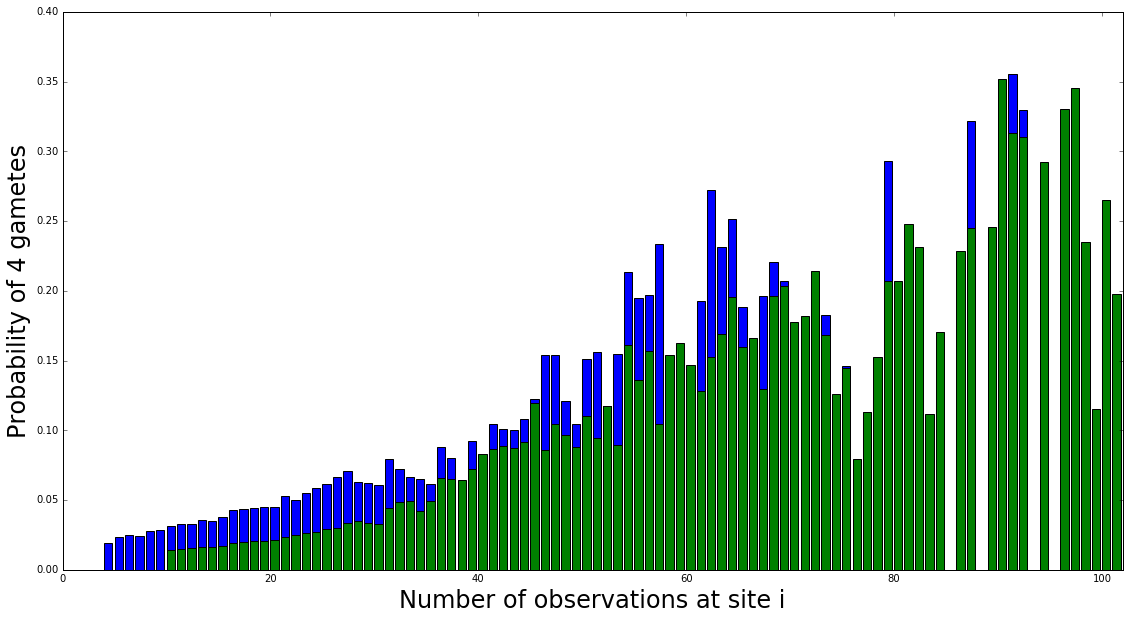

In [108]:
fig = figure(figsize=(19,10))
bar(x_x, y_x, label="X chromosome only", color='blue')
bar(x_x19, y_x19, label='X chromosome and chr19', color='green')
xlabel("Number of observations at site i", fontsize=24)
ylabel("Probability of 4 gametes", fontsize=24)
xlim(min(x), max(x))
savefig("fg_proba.pdf")


In [ ]:
print len(data)

In [ ]:
import random
def build_random():
    a = ["0", "1"]
    c1, c2 = random.choice(a), random.choice(a)
    return c1+c2



In [ ]:
filename = 'min_20_ijiuj.hist.txt'
data = []
for line in open(filename):
    line_arr = line.strip().split()
    data.append([map(int, inner.split(";")[:-1]) for inner in line_arr])

print len(data), len(data[0]), len(data[0][0]), len(data[-1]), len(data[0][-1])


In [ ]:
fig = figure()
ax = fig.add_subplot(111, projection='3D')
ax.plot_wireframe(zip(*data))

In [ ]:
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 
data = np.asarray(data)
print data.shape
for i, d in enumerate(data):
    if len(data[i]) != 103:
        print "i", i, len(data[i])
    for j, e in enumerate(d):
        if len(data[i][j]) != 103:
            print "j", i, j,len(data[i][j])
            
a = zip(*data)
print len(a), len(b), len(c)

In [ ]:
data = np.asarray(data)
X_train = []
y_train = []
for x_i, x in enumerate(data):
    for y_i, y in enumerate(x):
        for z_i, z in enumerate(y):
            for _ in range(z):
                X_train.append([x_i,y_i])
                y_train.append(z_i)

print len(X_train)

In [1]:
from lr import build_test_train

In [2]:
X_train, y_train = build_test_train()

In [5]:
import numpy as np

In [6]:
print np.mean(y_train)

6.66336344187


In [81]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=False, n_jobs=-1)
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=False)

In [82]:
lr.predict([50,50])

/Users/hillst/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 14.36859938])

In [83]:
lr.score([[20,20]], [100000000000.])

0.0

In [84]:
res0= lr.predict([(1,i) for i in range(103)])
res1 = lr.predict([(i,1) for i in range(103)])
resb = lr.predict([(i,i) for i in range(103)])

In [36]:
from pylab import *
%matplotlib inline

[ 0.24176866  0.24157623]


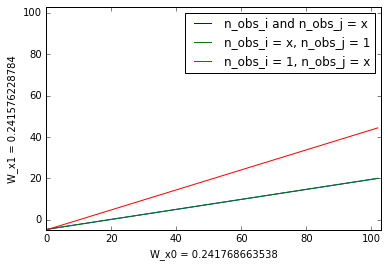

In [66]:
res0= lr.predict([(1,i) for i in range(103)])
res1 = lr.predict([(i,1) for i in range(103)])
resb = lr.predict([(i,i) for i in range(103)])
fig = figure()
plot(range(103), res0, label="n_obs_i = 1, n_obs_j = x")
plot(range(103), res1, label="n_obs_i = x, n_obs_j = 1")
plot(range(103), resb, label="n_obs_i = x, n_obs_j = x")
legend()
xlim(0,103)
ylim(lr.intercept_,103)
xlabel("W_x0 = " + str(lr.coef_[0]))
ylabel("W_x1 = " + str(lr.coef_[1]))

print lr.coef_

In [69]:
print lr.intercept_
eq = .24 * x + .24 * y - 5
#fits the estimation that about half of the total sites from i j will be covered
#can we adjust it for adjacency? 

-4.86170668622


TypeError: can't multiply sequence by non-int of type 'float'

In [67]:
from random import sample

X_r = []
y_r = []

n_tries = 20
for i in range(103):
    for j in range(103):
        for k in range(n_tries):
            X_r.append([i,j])
            intersect = set(sample(range(103), i)) & set(sample(range(103), j))
            y_r.append(len(intersect))
            
            


In [79]:
lr_r = LinearRegression(fit_intercept=False, normalize=True)
lr_r.fit(X_r, y_r)
print lr_r.coef_, lr_r.intercept_

[ 0.28357371  0.28354063] 0.0


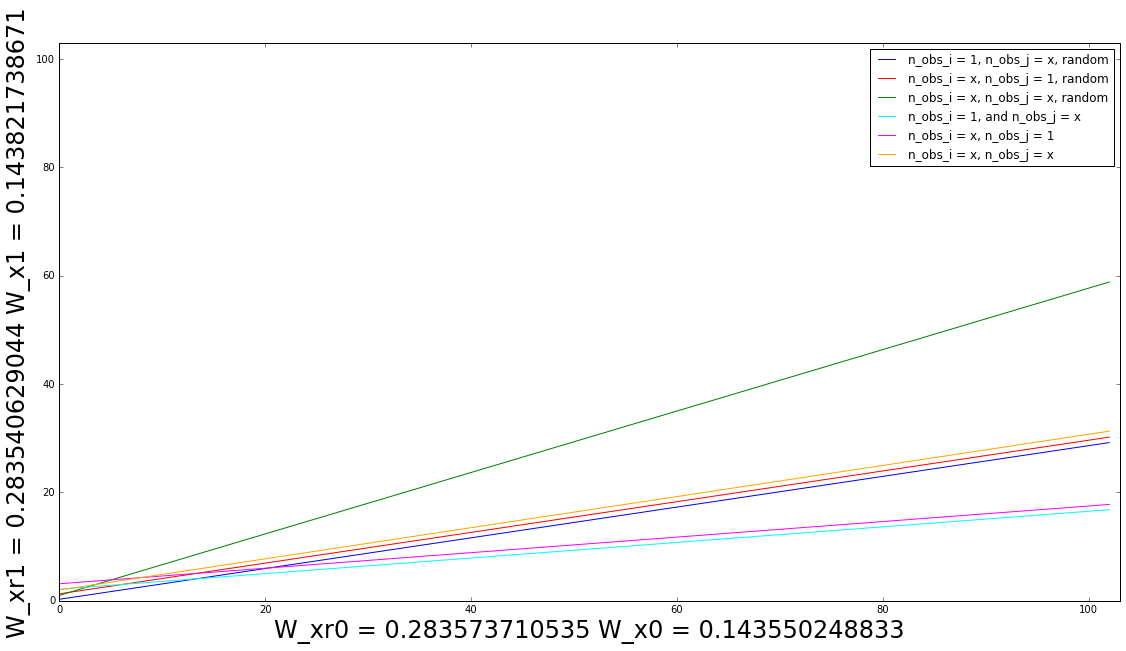

In [107]:
res0_r = lr_r.predict([(1,i) for i in range(103)])
res1_r = lr_r.predict([(i,1) for i in range(103)])
resb_r = lr_r.predict([(i,i) for i in range(103)])
fig = figure(figsize=(19,10))
plot(range(103), res0_r, c='blue',label="n_obs_i = 1, n_obs_j = x, random")
plot(range(103), res1_r+1, c='red',label="n_obs_i = x, n_obs_j = 1, random")
plot(range(103), resb_r+1, c='green', label="n_obs_i = x, n_obs_j = x, random")

plot(range(103), res0+2, c='cyan', label="n_obs_i = 1, and n_obs_j = x")
plot(range(103), res1+3, c='magenta', label="n_obs_i = x, n_obs_j = 1")
plot(range(103), resb+2, c='orange',label="n_obs_i = x, n_obs_j = x")
legend()
xlim(0,103)
ylim(lr.intercept_,103)
xlabel("W_xr0 = " + str(lr_r.coef_[0]) + " W_x0 = " + str(lr.coef_[0]), fontsize=24)
ylabel("W_xr1 = " + str(lr_r.coef_[1])+ " W_x1 = " + str(lr.coef_[1]), fontsize=24)
savefig("our_data_v_random_lr.pdf")